A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the factors that predict how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most effective model that uses the least amount of computation costs to save on the budget. You will need to analyze the dataset on students' performance and develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.

The dataset used in this activity is included as `student-data.csv`. This dataset has the following attributes:

- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
-  `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
-  `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
-  `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
-`absences` : number of school absences (numeric: from 0 to 93)
- `passed` : did the student pass the final exam (binary: yes or no)



---------------------
Our goal is to develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.

This is a classification machine learning problem with the target variable as 'passed' with two binary values yes or no. 

In [105]:
#importing neccessary libraries 
import numpy as np
import pandas as pd 

In [106]:
#Reading the dataset 
df = pd.read_csv('student-data.csv')

In [107]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [108]:
#Checking for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [109]:
#Checking if this is a balanced dataset 
df['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [110]:
#Identifying the Identify feature and target columns
X= df.drop(['passed'],axis=1)
y =df['passed']
y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

# Preprocessing

In [111]:
#Target
#We see the target variable is binary with yes or no. We can apply label encoding which is a requirement 
#for Extreme gradient boosting

#from sklearn.preprocessing import LabelEncoder

#label_en = LabelEncoder()
#y= label_en.fit_transform(y)

In [112]:
#Preprocessing the features 

#There are a lot of features that are object data type which are binary like 'Yes' or 'No'. They can be 
#label encoded to 0 and 1. The reason I am chosing label encoding here for a categorical variable with only two 
#unique values is because it may lead to multicollinearty and eventualy we will have to do dummy variable dropping. 
#Therefore label encoding is chosen for features with binary values. This will also hopefully reduce the number
#of features and reduce computational cost.

label_encoders = {}
binary_features= ['school','sex','address','famsize','Pstatus',
                  'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    X[i] = label_encoders[i].fit_transform(X[i])  


In [113]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [114]:
#For features Mjob,Fjob,reason,guardian which are nominal categorical variables;
#Since they are not ordinal, applying one hot encoding.
X = pd.get_dummies(X)

In [115]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [116]:
X.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,...,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
#Performing Min Max scaling 
from sklearn import preprocessing  
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [118]:
# Splitting the data
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [119]:
# Show the results of the split
X_train.shape


(316, 43)

##Training the model

Using some of the commonly used algorithms, we will be training our model to find the most effective model that uses the least amount of computation costs . We will be implementing the following algorithms to compare:

1. Logistic Regression 
2. Support Vector Machine (SVM)
3. K – Nearest Neighbour (KNN)
4. Decision Trees
5. Random Forest
6. GB
7. XGB

In [120]:
import time

def train_classifier(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Done!\nTraining time (secs): {:.3f}".format(end - start))



# Logistic Regression 

In [121]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Fit model to training data
train_classifier(clf, X_train, y_train)  
print (clf)

Training LogisticRegression...
Done!
Training time (secs): 0.034
LogisticRegression()


In [130]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print ("Predicting labels using {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Done!\nPrediction time (secs): {:.3f}".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')

train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf, X_test, y_test)))

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.8394004282655245
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.8034188034188035


# Support Vector Machine 

In [151]:
from sklearn.svm import SVC
clf2 = SVC()

# Fit model to training data
train_classifier(clf2, X_train, y_train)  
print (clf2)

Training SVC...
Done!
Training time (secs): 0.013
SVC()


In [152]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

train_f1_score = predict_labels(clf2, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf2, X_test, y_test)))

Predicting labels using SVC...
Done!
Prediction time (secs): 0.027
F1 score for training set: 0.8571428571428571
Predicting labels using SVC...
Done!
Prediction time (secs): 0.005
F1 score for test set: 0.7874015748031495


# KNN neighbour

In [131]:
from sklearn.neighbors import KNeighborsClassifier

#To find the optimum K value. For this we have to create model with varied k values 

acc_values = [] 
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    
    #append the accuracy value to list 
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)  

[0.5569620253164557, 0.5063291139240507, 0.5949367088607594, 0.6329113924050633, 0.6708860759493671, 0.6455696202531646, 0.6835443037974683, 0.6835443037974683, 0.6582278481012658, 0.6582278481012658, 0.6455696202531646, 0.6329113924050633]


Text(0, 0.5, 'Accuracy')

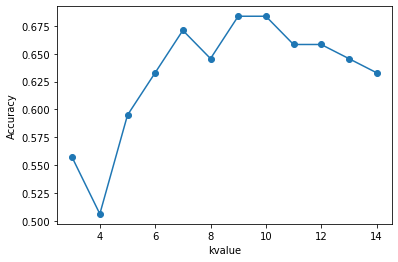

In [132]:
#Lets find for which value we got the max accuracy 
plt.plot(neighbors,acc_values, 'o-') #'o-' is shape
plt.xlabel('kvalue')
plt.ylabel('Accuracy')

In [134]:
#Running again for KNN = 10

clf3 = KNeighborsClassifier(n_neighbors = 10,metric = 'minkowski')
# Fit model to training data
train_classifier(clf3, X_train, y_train)  
print (clf3)

Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
KNeighborsClassifier(n_neighbors=10)


In [135]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

train_f1_score = predict_labels(clf3, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf3, X_test, y_test)))

Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.039
F1 score for training set: 0.8132780082987551
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.008
F1 score for test set: 0.7933884297520661


# Decision Tree 

In [138]:
from sklearn.tree import DecisionTreeClassifier
clf4 = DecisionTreeClassifier()

# Fit model to training data
train_classifier(clf4, X_train, y_train)  
print (clf4)

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.008
DecisionTreeClassifier()


In [139]:
# Predict on training set and compute F1 score

train_f1_score = predict_labels(clf4, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf4, X_test, y_test)))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.002
F1 score for training set: 1.0
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.7222222222222223


# Random Forest Classifier 

In [153]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier()

# Fit model to training data
train_classifier(clf5, X_train, y_train)  
print (clf5)

Training RandomForestClassifier...
Done!
Training time (secs): 0.202
RandomForestClassifier()


In [154]:
# Predict on training set and compute F1 score

train_f1_score = predict_labels(clf5, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf5, X_test, y_test)))

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.022
F1 score for training set: 1.0
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.016
F1 score for test set: 0.8064516129032258


# Gradient Boosting 

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
clf6 = GradientBoostingClassifier()

# Fit model to training data
train_classifier(clf6, X_train, y_train)  
print (clf6)

Training GradientBoostingClassifier...
Done!
Training time (secs): 0.130
GradientBoostingClassifier()


In [156]:
# Predict on training set and compute F1 score

train_f1_score = predict_labels(clf6, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf6, X_test, y_test)))

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.003
F1 score for training set: 0.9726027397260273
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.7758620689655172


# Xtreme Gradient Boosting 

In [157]:
#We see the target variable is binary with yes or no. We can apply label encoding which is a requirement 
#for Extreme gradient boosting

from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
y= label_en.fit_transform(y)

In [158]:
from xgboost import XGBClassifier 
clf7 = GradientBoostingClassifier()

# Fit model to training data
train_classifier(clf7, X_train, y_train)  
print (clf6)

Training GradientBoostingClassifier...
Done!
Training time (secs): 0.106
GradientBoostingClassifier()


In [159]:
# Predict on training set and compute F1 score

train_f1_score = predict_labels(clf7, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))
# Predict on test data
print ('F1 score for test set: {}'.format(predict_labels(clf7, X_test, y_test)))

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.003
F1 score for training set: 0.9681818181818181
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.7999999999999999


In [5]:
#Comparing the training and test times Vs F1 Score of each models

from texttable import Texttable

# texttable takes the first reocrd in the list as the column names
# of the table
l = [['Classifier','Training Time','Prediction Time(test)','F1 Score(train)','F1 Score (test)'],
    ['LR', 0.034, 0.000,0.8394,0.8034],
    ['SVM', 0.013,0.005,0.8571,0.7874],
    ['KNN', 0.001,0.008,0.8132, 0.7933],
    ['DT', 0.008,0.001,1.0, 0.7222],
    ['RF', 0.202,0.016,1.0, 0.8064],
    ['GB', 0.130,0.001,0.9726, 0.7758],
    ['XGB', 0.106,0.101,0.9681, 0.7999]]

table = Texttable()
table.add_rows(l)
print(table.draw())



+------------+---------------+----------------+----------------+---------------+
| Classifier | Training Time |   Prediction   |       F1       |   F1 Score    |
|            |               |   Time(test)   |  Score(train)  |    (test)     |
+============+===============+================+================+===============+
| LR         | 0.034         | 0              | 0.839          | 0.803         |
+------------+---------------+----------------+----------------+---------------+
| SVM        | 0.013         | 0.005          | 0.857          | 0.787         |
+------------+---------------+----------------+----------------+---------------+
| KNN        | 0.001         | 0.008          | 0.813          | 0.793         |
+------------+---------------+----------------+----------------+---------------+
| DT         | 0.008         | 0.001          | 1              | 0.722         |
+------------+---------------+----------------+----------------+---------------+
| RF         | 0.202        

# Conculsion

Random forest model gives the highest F1 score of 0.806 with a relatively high compuational cost (0.202+0.016).<br>

However, Logistic Regression gives an almost similar F1 score of 0.803 for much lesser training time of 0.034 and 0 prediction time. 

Therefore, we can choose Logistic Regression as the most effective model that uses the least amount of computation costs to save on the budget.